In [ ]:
# Importo librerías
from numpy import mean, std
import numpy as np
import xgboost as xgb # pip install xgboost
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [ ]:
# Defino un dataset con sólo 1 feature (1 variable X)
X = np.linspace(-5 , 5, 100).reshape(100, 1)
y_limpia = np.sin(3 * X) - X
y_ruido = np.random.normal(size=len(X)).reshape(y_limpia.shape)
y = y_limpia + y_ruido

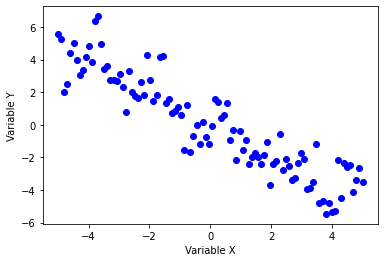

In [ ]:
plt.scatter(X, y, color = 'blue')   
plt.xlabel('Variable X') 
plt.ylabel('Variable Y') 
plt.show()

En este caso se dividen los conjuntos en Train + Test. A su vez, el conjunto de Train se divide con validación cruzada en tres conjuntos. Utilizando el método GridSearchCV se optimizan tres parámetros: eta, lambda y max_depth. Se prueban todas las combinaciones posibles de esos tres parámetros (GridSearch) y se valida cada combinación con validación cruzada (CV)

In [ ]:
# Divido en dos datasets, train (con el que optimizo los hiperparámetros) y test (con el que 
# pruebo el rendimiento del modelo)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [ ]:
# Obtengo el mejor parámetro de profundidad del árbol entre 3 y 7 usando 
# validación cruzada y gridsearch
regr = xgb.XGBRegressor()
params = {"eta": [0.3, 0.5], "lambda":[0.5, 1.0], "max_depth": [3, 7]}
regr_opt = GridSearchCV(regr, params, cv=3)
regr_opt.fit(X_train, y_train)
print('Los mejores hiperparámetros son: {}'.format(regr_opt.best_params_))

[18:50:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:50:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:50:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:50:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:50:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:50:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:50:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:50:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
y_train_pred = regr_opt.predict(X_train)
y_test_pred = regr_opt.predict(X_test)

In [ ]:
print('La R^2 en los datos de train es: {}'.format(np.round(r2_score(y_train, y_train_pred),2)))
print('La R^2 en los datos de test es: {}'.format(np.round(r2_score(y_test, y_test_pred),2)))

X_fit = np.linspace(-5, 5, 1000).reshape(1000, 1)
y_fit = regr_opt.predict(X_fit)

La R^2 en los datos de train es: 0.98
La R^2 en los datos de test es: 0.83


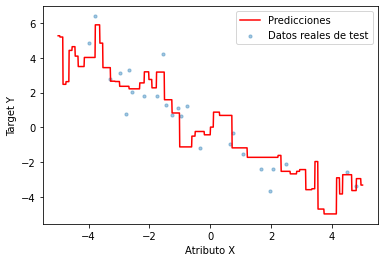

In [ ]:
plt.scatter(X_test, y_test, label="Datos reales de test", alpha=0.4, s=10)
plt.plot(X_fit, y_fit, c="red", label="Predicciones")
plt.legend()
plt.xlabel("Atributo X")
plt.ylabel("Target Y")
plt.show()
